<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Totals" data-toc-modified-id="Totals-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Totals</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Comparing neg + pos controls versus treatments

# Var

In [102]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/'

# all samples & taxa
physeq_file = file.path(work_dir, 'physeq_all.rds')

# params
threads = 16

# Init

In [103]:
library(dtplyr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(doParallel)
library(LeyLabRMisc)

In [104]:
df.dims()

# Load

In [105]:
# phyloseq object
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 79104 taxa and 301 samples ]
sample_data() Sample Data:       [ 301 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 79104 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 79104 tips and 78987 internal nodes ]

In [106]:
# OTU table  
otu = phyloseq2df(physeq, otu_table, long=TRUE) %>%
    group_by(Sample) %>%
    mutate(TOTAL_CNT = sum(Count)) %>%
    ungroup() %>%
    mutate(Perc_abund = Count / TOTAL_CNT * 100) %>%
    dplyr::select(-TOTAL_CNT)
otu 

OTU,Sample,Count,Perc_abund
<chr>,<chr>,<dbl>,<dbl>
27056924d25a972043773840061213f9,F14_Common_Bream,0,0
91783a64f15025a663fb7ca42b62aa27,F14_Common_Bream,0,0
⋮,⋮,⋮,⋮
499551aa042940d0668b0e44fe97517d,X98_Eurasian_Red_Squirrel,0,0
b76690c467af807ee8f7ed9773f7ab40,X98_Eurasian_Red_Squirrel,0,0


In [107]:
# metadata
meta = phyloseq2df(physeq, sample_data) 
meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail,Sample
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,2010-08-10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple,F14_Common_Bream
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,2010-09-29,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,2011-10-31,autumn,#VALUE!,Screw cap vial,feces sampling,herbivore,concentrate selector,foregut,foregut,X67_European_Roe
X98_Eurasian_Red_Squirrel,98,Eichhoernchen,Eurasian.Red.Squirrel,Sciurus_vulgaris,NA,55149,Mammalia,Rodentia,Sciuridae,⋯,2011-11-03,autumn,#VALUE!,Screw cap vial,gut section,omnivore,NA,simple hindgut,caecum,X98_Eurasian_Red_Squirrel


In [108]:
# filtering metadata 
meta_f = meta %>%
    dplyr::select(SampleID, host_common_name, scientific_name, 
                  class, order, family, genus, diet, habitat) %>%
    mutate(class = class %>% as.character,
           class = ifelse(grepl('Indian.Gazelle', SampleID), 'Mammalia', class))
meta_f

SampleID,host_common_name,scientific_name,class,order,family,genus,diet,habitat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,Common.Bream,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,omnivore,aquatic habitat
F35_Red_Deer,Red.Deer,Cervus_elaphus,Mammalia,Artiodactyla,Cervidae,Cervus,herbivore,terrestrial habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X67_European_Roe,European.Roe,Capreolus_capreolus,Mammalia,Artiodactyla,Cervidae,Capreolus,herbivore,terrestrial habitat
X98_Eurasian_Red_Squirrel,Eurasian.Red.Squirrel,Sciurus_vulgaris,Mammalia,Rodentia,Sciuridae,Sciurus,omnivore,terrestrial habitat


In [109]:
# taxonomy
tax = phyloseq2df(physeq, tax_table)
tax

Domain,Phylum,Class,Order,Family,Genus,Species,OTU
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Bacteria,Proteobacteria,Gammaproteobacteria,unclassified,unclassified,unclassified,unclassified,27056924d25a972043773840061213f9
Bacteria,Proteobacteria,Gammaproteobacteria,unclassified,unclassified,unclassified,unclassified,91783a64f15025a663fb7ca42b62aa27
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,unclassified,unclassified,499551aa042940d0668b0e44fe97517d
Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,unclassified,unclassified,b76690c467af807ee8f7ed9773f7ab40


# Totals

In [110]:
# summarizing
otu_all = meta_f %>%
    inner_join(otu, c('SampleID'='Sample')) %>%
    inner_join(tax, c('OTU')) %>%
    mutate(class = class %>% as.character,
           NGS_control = ifelse(grepl('^(Neg_control|water)', SampleID),
                                'PCR_neg_cont', class),
           NGS_control = ifelse(grepl('^(Pos_control|methanogen|mock)', SampleID),
                                'PCR_pos_cont', NGS_control)) 
otu_all

SampleID,host_common_name,scientific_name,class,order,family,genus,diet,habitat,OTU,Count,Perc_abund,Domain,Phylum,Class,Order,Family,Genus,Species,NGS_control
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,Common.Bream,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,omnivore,aquatic habitat,27056924d25a972043773840061213f9,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,unclassified,unclassified,unclassified,unclassified,Actinopterygii
F14_Common_Bream,Common.Bream,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,omnivore,aquatic habitat,91783a64f15025a663fb7ca42b62aa27,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,unclassified,unclassified,unclassified,unclassified,Actinopterygii
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X98_Eurasian_Red_Squirrel,Eurasian.Red.Squirrel,Sciurus_vulgaris,Mammalia,Rodentia,Sciuridae,Sciurus,omnivore,terrestrial habitat,499551aa042940d0668b0e44fe97517d,0,0,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,unclassified,unclassified,Mammalia
X98_Eurasian_Red_Squirrel,Eurasian.Red.Squirrel,Sciurus_vulgaris,Mammalia,Rodentia,Sciuridae,Sciurus,omnivore,terrestrial habitat,b76690c467af807ee8f7ed9773f7ab40,0,0,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,unclassified,unclassified,Mammalia


In [111]:
# number of sequences
otu_all_s = otu_all %>%
    filter(Count > 0) %>%
    group_by(SampleID, NGS_control) %>%
    summarize(nOTU = OTU %>% unique %>% length,
              Total_count = sum(Count),
              .groups='drop') %>%
    ungroup() %>%
    gather(category, value, -SampleID, -NGS_control)
otu_all_s

SampleID,NGS_control,category,value
<chr>,<chr>,<chr>,<dbl>
F14_Common_Bream,Actinopterygii,nOTU,667
F141_Wood_Sandpiper,Aves,nOTU,5
⋮,⋮,⋮,⋮
X96_European_Hare,Mammalia,Total_count,21879
X98_Eurasian_Red_Squirrel,Mammalia,Total_count,3949


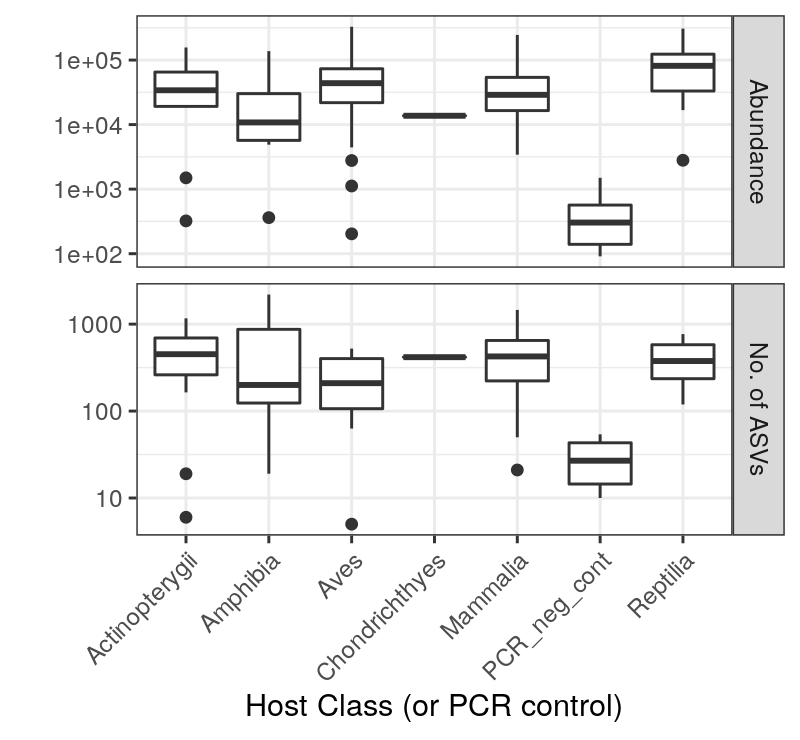

In [112]:
# number of sequences: plotting
p = otu_all_s %>%
    filter(NGS_control != 'PCR_pos_cont') %>%
    mutate(category = ifelse(category == 'nOTU', 'No. of ASVs', 'Abundance')) %>%
    ggplot(aes(NGS_control, value)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='Host Class (or PCR control)', y='') +
    facet_grid(category ~ ., scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,3.7)
plot(p)

In [117]:
# summary table
otu_all_f = otu_all %>%
    filter(NGS_control == 'PCR_neg_cont',
           Count > 0)  %>%
    group_by(SampleID) %>%
    mutate(TOTAL = sum(Count)) %>%
    group_by(SampleID, Domain, Phylum, Class, Order, Family, Genus, Species) %>%
    summarize(perc_abund = sum(Count) / TOTAL * 100,
              nOTU = OTU %>% unique %>% length,
              .groups='drop') %>%
    group_by(Domain, Phylum, Class, Order, Family, Genus, Species) %>%
    summarize(mean_perc_abund = mean(perc_abund),
              mean_nOTU = mean(nOTU),
              .groups='drop') %>%
    filter(mean_perc_abund >= 10) %>%
    arrange(-mean_perc_abund)
df.dims(40)
otu_all_f %>% head(n=40)
df.dims()

Domain,Phylum,Class,Order,Family,Genus,Species,mean_perc_abund,mean_nOTU
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Catellicoccus,Catellicoccus marimammalium M35/04/3,31.64414,1.000000
Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Catenibacterium,unclassified,20.20202,1.000000
Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,unclassified,16.61021,2.555556
Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,unclassified,13.64867,1.222222
Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Lactococcus,unclassified,12.00887,1.571429
Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae UCG-014,unidentified rumen bacterium RFN33,10.87733,1.571429


In [114]:
F = file.path(work_dir, 'neg_cont_summary.tsv')
otu_all_f %>% write_table(F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq//neg_cont_summary.tsv 


# sessionInfo

In [54]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] LeyLabRMisc_0.1.1 doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7    
[5] phyloseq_1.30.0   ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      
[9] dtplyr_1.0.0     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3          ape_5.3             lattic